# Объявления о продаже Lexus CT (2011 - 2019 года выпуска). 

## Данные с сайта nettiauto.com на основе 167 проданных автомобиля

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set options
pd.set_option("max_colwidth", 100)

# library & dataset
import seaborn as sns

## 1. Просмотр датасета

In [2]:
#df1 = pd.read_csv('1.csv')
df = pd.read_csv('lexus.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Merkki  181 non-null    object
 1   Vuosi   181 non-null    object
 2   Ajettu  181 non-null    object
 3   Hinta   181 non-null    object
 4   Date    181 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Merkki  181 non-null    object
 1   Vuosi   181 non-null    object
 2   Ajettu  181 non-null    object
 3   Hinta   181 non-null    object
 4   Date    181 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [5]:
#df = pd.concat([df1, df2])

In [6]:
df.head(3)

,Merkki,Vuosi,Ajettu,Hinta,Date
0,Make & model|Year|Mileage|Price|Sold date,Year,Mileage,Price,Sold date
1,Lexus CT (1.8)|2011|127 650|16 200 €|00-0000,2011,127 650,16 200 €,00-0000
2,"Lexus CT (1.8) 200h Hybrid A Executive - Rahoitus 1.89% jopa ilman käsirahaa! Nahat, Navi, Xenon...",2011,156 000,13 800 €,06-2021


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Merkki  181 non-null    object
 1   Vuosi   181 non-null    object
 2   Ajettu  181 non-null    object
 3   Hinta   181 non-null    object
 4   Date    181 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


## 2. Чистка датасета

In [8]:
# переименуем столбцы
df = df.rename(columns = {'Merkki': 'model_description',
                         'Vuosi': 'Year',
                         'Ajettu': 'Mileage',
                         'Hinta': 'Price',
                         'Date': 'Sold_date'})

In [9]:
# удалим пробелы
df['Mileage'] = df['Mileage'].str.replace(" ", "")
df['Price'] = df['Price'].str.replace(" ", "")

In [10]:
df.tail()

,model_description,Year,Mileage,Price,Sold_date
176,Make & model|Year|Mileage|Price|Sold date,Year,Mileage,Price,Sold date
177,Lexus CT (1.8) 200h Comfort / Suomiauto|2019|4 386|28 800 €(incl. VAT)|07-2021,2019,4386,28800€(incl.VAT),07-2021
178,Lexus CT (1.8) 200h F Sport / F Sport / LED ajovalot / Parkkitutkat|2019|16 000|26 990 €|07-2021,2019,16000,26990€,07-2021
179,Lexus CT (1.8) / Nahat / Navi / Kamera|2019|39 000|24 890 €|07-2021,2019,39000,24890€,07-2021
180,Lexus CT (1.8) 200h Comfort ** Suomi-auto **|2019|32 000|27 490 €|11-2021,2019,32000,27490€,11-2021


In [11]:
df.head()

,model_description,Year,Mileage,Price,Sold_date
0,Make & model|Year|Mileage|Price|Sold date,Year,Mileage,Price,Sold date
1,Lexus CT (1.8)|2011|127 650|16 200 €|00-0000,2011,127650,16200€,00-0000
2,"Lexus CT (1.8) 200h Hybrid A Executive - Rahoitus 1.89% jopa ilman käsirahaa! Nahat, Navi, Xenon...",2011,156000,13800€,06-2021
3,Lexus CT (1.8)|2011|158 316|12 000 €|06-2021,2011,158316,12000€,06-2021
4,Lexus CT (1.8) 200h Hybrid A Comfort // Alcantara-penkit / LED-ajovalot / Aux & Bluetooth //|201...,2011,90500,14350€,07-2021


In [12]:
#df.loc[740:]

In [13]:
# разделим датасеты
#df = df.loc[740:]
#df.head(3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model_description  181 non-null    object
 1   Year               181 non-null    object
 2   Mileage            181 non-null    object
 3   Price              181 non-null    object
 4   Sold_date          181 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [15]:
# удалим лишнее Vuosi
df = df.drop(df.query('Year == "Vuosi"').index.values.tolist())
df = df.drop(df.query('Year == "Year"').index.values.tolist())

# удалим данные где дата продажи 0
drop_nulls = df.query('Sold_date == "00-0000"').index.values.tolist()
df = df.drop(drop_nulls)

In [16]:
df['Year'].unique()

array(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'], dtype=object)

In [17]:
# приведем к формату времени
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [18]:
# приведем к формату времени
df['Sold_date'] = pd.to_datetime(df['Sold_date'], format='%m-%Y')

In [19]:
# удалим данные где мили Eiilmoitettu
drop_next = df[df['Mileage'] == 'Eiilmoitettu'].index.values.tolist()
for i in drop_next:
    df = df.drop(index = i)

In [20]:
# удалим данные где мили Eihin
drop_a = df[df['Price'] == 'Eihin'].index.values.tolist()
for i in drop_a:
    df = df.drop(index = i)

In [21]:
# удалим данные где не указан пробег
drop_ns = df[df['Mileage'] == 'Notspecified'].index.values.tolist()
for i in drop_ns:
    df = df.drop(index = i)

In [22]:
# мили целочисленные значения
df['Mileage'] = df['Mileage'].astype('float64') 

In [23]:
# цена 5 знаков
df['Price'] = df['Price'].str[:5]
# удалим пробелы
df['Price'] = df['Price'].str.replace("€", "")

In [24]:
# удалим данные где цена Eihin
drop_a = df[df['Price'] == 'Eihin'].index.values.tolist()
for i in drop_a:
    df = df.drop(index = i)

In [25]:
# удалим данные где цена Notpr
drop_nt = df[df['Price'] == 'Notpr'].index.values.tolist()
for i in drop_nt:
    df = df.drop(index = i)

In [26]:
# сделаем цену целочисленным значением
df['Price'] = df['Price'].astype(int) 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 2 to 180
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  167 non-null    object        
 1   Year               167 non-null    datetime64[ns]
 2   Mileage            167 non-null    float64       
 3   Price              167 non-null    int64         
 4   Sold_date          167 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 7.8+ KB


In [28]:
df.head(3)

,model_description,Year,Mileage,Price,Sold_date
2,"Lexus CT (1.8) 200h Hybrid A Executive - Rahoitus 1.89% jopa ilman käsirahaa! Nahat, Navi, Xenon...",2011-01-01,156000.0,13800,2021-06-01
3,Lexus CT (1.8)|2011|158 316|12 000 €|06-2021,2011-01-01,158316.0,12000,2021-06-01
4,Lexus CT (1.8) 200h Hybrid A Comfort // Alcantara-penkit / LED-ajovalot / Aux & Bluetooth //|201...,2011-01-01,90500.0,14350,2021-07-01


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 2 to 180
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  167 non-null    object        
 1   Year               167 non-null    datetime64[ns]
 2   Mileage            167 non-null    float64       
 3   Price              167 non-null    int64         
 4   Sold_date          167 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 7.8+ KB


In [30]:
df['Age'] = (df['Sold_date'] - df['Year']) / np.timedelta64(1, 'Y')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age
2,"Lexus CT (1.8) 200h Hybrid A Executive - Rahoitus 1.89% jopa ilman käsirahaa! Nahat, Navi, Xenon...",2011-01-01,156000.0,13800,2021-06-01,10.414998
3,Lexus CT (1.8)|2011|158 316|12 000 €|06-2021,2011-01-01,158316.0,12000,2021-06-01,10.414998
4,Lexus CT (1.8) 200h Hybrid A Comfort // Alcantara-penkit / LED-ajovalot / Aux & Bluetooth //|201...,2011-01-01,90500.0,14350,2021-07-01,10.497135


In [31]:
df.describe()

,Mileage,Price,Age
count,167.000000,167.000000,167.000000
mean,109563.347305,17205.065868,7.793608
std,54928.733415,4532.890684,2.524132
min,4386.000000,8500.000000,2.496971
25%,67500.000000,13490.000000,5.834480
50%,102000.000000,16800.000000,8.413588
75%,150750.000000,19900.000000,9.834562
max,288000.000000,28800.000000,10.916035


In [32]:
# дропнем аномалию c пробегом
# max = df['Mileage'].max()
# drop_max = df.query('Mileage == 1310000').index.values.tolist()
# df = df.drop(drop_max)
# df.head(3)

In [33]:
# сделаем градацию по пробегу 

def mileage(col):
    if col < 20000:
        return "< 20000"
    elif 20000 <= col < 50000 :
        return "20000 - 49999"
    elif 50000 <= col < 79999 :
        return "50000 - 79999"
    elif 80000 <= col < 100000 :
        return "80000 - 99999"
    else:
        return ">= 100000"

# произведем замену значений в DF
df['mileage_range'] = df['Mileage'].apply(mileage)

In [34]:
# сделаем градацию по пробегу 

def ages_range(col):
    if col < 3:
        return "< 3"
    elif 3 <= col < 5 :
        return "3 - 4"
    elif 5 <= col < 8 :
        return "5 - 7"
    else:
        return ">= 8"

# произведем замену значений в DF
df['age_range'] = df['Age'].apply(ages_range)

#### смотрим двигатели

In [35]:
# посмотрим на мотор
df['engine'] = df['model_description'].str.extract(r'(\d.\d)')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
2,"Lexus CT (1.8) 200h Hybrid A Executive - Rahoitus 1.89% jopa ilman käsirahaa! Nahat, Navi, Xenon...",2011-01-01,156000.0,13800,2021-06-01,10.414998,>= 100000,>= 8,1.8
3,Lexus CT (1.8)|2011|158 316|12 000 €|06-2021,2011-01-01,158316.0,12000,2021-06-01,10.414998,>= 100000,>= 8,1.8
4,Lexus CT (1.8) 200h Hybrid A Comfort // Alcantara-penkit / LED-ajovalot / Aux & Bluetooth //|201...,2011-01-01,90500.0,14350,2021-07-01,10.497135,80000 - 99999,>= 8,1.8


In [36]:
df['engine'].unique()

array(['1.8'], dtype=object)

In [37]:
# выбросы "201=(2.0)", "2,0=(2.0)", "0,9=(2.0)"
#df.query('engine == "1,9"')

In [38]:
#df.loc[df['engine'] == '202','engine'] = '0.0'
#df.loc[df['engine'] == '1 3','engine'] = '0.0'
#df.loc[df['engine'] == '136','engine'] = '0.0'
#df.loc[df['engine'] == '0 3','engine'] = '0.0'
#df.loc[df['engine'] == '0|2','engine'] = '0.0'
#df.loc[df['engine'] == '1,8','engine'] = '0.0'
#df.loc[df['engine'] == '0 1','engine'] = '0.0'
#df.loc[df['engine'] == '590','engine'] = '0.0'
#df.loc[df['engine'] == '201','engine'] = '0.0'
#df.loc[df['engine'] == '120','engine'] = '0.0'
#df.loc[df['engine'] == '0,9','engine'] = '0.0'
#df.loc[df['engine'] == '5|2','engine'] = '0.0'
#df.loc[df['engine'] == '0,8','engine'] = '0.0'
#df.loc[df['engine'] == '200','engine'] = '0.0'
#df.loc[df['engine'] == '2,4','engine'] = '0.0'
#df.loc[df['engine'] == '1,5','engine'] = '0.0'
#df.loc[df['engine'] == '1,4','engine'] = '0.0'
#df.loc[df['engine'] == '1,9','engine'] = '0.0'

#### смотрим модификации

In [39]:
# посмотрим на модификации
#df['Electric'] = df['model_description'].str.contains("Electric")
#df['Hybrid'] = df['model_description'].str.contains("Hybrid")
#df['Plug-In '] = df['model_description'].str.contains("Plug-In ")
df.sample(10)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
131,Lexus CT (1.8)|2015|98 353|18 000 €|11-2021,2015-01-01,98353.0,18000,2021-11-01,6.833816,80000 - 99999,5 - 7,1.8
61,Lexus CT (1.8)|2012|158 000|10 990 €|07-2021,2012-01-01,158000.0,10990,2021-07-01,9.497799,>= 100000,>= 8,1.8
6,"Lexus CT (1.8) 200h Hybrid A Luxury *Rahoitus 0,86% + kulut Huoltorahalla / Nahat / Navi*|2011|1...",2011-01-01,123000.0,13400,2021-06-01,10.414998,>= 100000,>= 8,1.8
125,"Lexus CT (1.8) 200h Hybrid A Comfort Business *** Kotiinkuljetus mahdollisuus, kysy lisää myyjä...",2015-01-01,90000.0,18980,2021-10-01,6.748941,80000 - 99999,5 - 7,1.8
81,"Lexus CT (1.8) 200h Hybrid A Comfort # Uudet talvirenkaat, # Kamera, Vakkari, Lohkari #|2013|142...",2013-01-01,142000.0,12700,2021-06-01,8.413588,>= 100000,>= 8,1.8
91,Lexus CT (1.8) 200h Hybrid A Comfort (MY13)|2013|170 000|12 800 €|09-2021,2013-01-01,170000.0,12800,2021-09-01,8.665476,>= 100000,>= 8,1.8
165,Lexus CT (1.8) 200h Comfort ** 1-Omisteinen / Suomi-auto / Navi / Teknologia paketti ym. **|2018...,2018-01-01,34000.0,25490,2021-07-01,3.496307,20000 - 49999,3 - 4,1.8
33,Lexus CT (1.8) 200h Hybrid A Executive // Mark Levingston // Nahat // Navi// Huollettu|2011|222 ...,2011-01-01,222280.0,11300,2021-10-01,10.749023,>= 100000,>= 8,1.8
163,Lexus CT (1.8)|2018|80 156|22 499 €(Tax free)|07-2021,2018-01-01,80156.0,22499,2021-07-01,3.496307,80000 - 99999,3 - 4,1.8
39,Lexus CT (1.8)|2011|217 936|11 900 €|11-2021,2011-01-01,217936.0,11900,2021-11-01,10.833898,>= 100000,>= 8,1.8


In [40]:
#test = df.loc[740:740]['model_description']
#test.str.contains("Hybrid")

In [41]:
#test = 'Hyundai Ioniq Hybrid (1.6) **Rahoitus 0,86% + kulut Huoltorahalla**|2016|62 000|18 400 €|06-2021'
#test.find("Hybrid")

In [42]:
# сделаем градацию по комплектации

#def modification(col):
    #if col.find("Comfort") == "Comfort":
        #return "Comfort"
    #elif col.find("ECO") == "ECO" :
        #return "ECO"
    #elif col.find("Executive") == "Executive" :
        #return "Executive"
    #elif col.find("F-Sport") == "F-Sport" :
        #return "F-Sport"
    #elif col.find("Luxury") == "Luxury" :
        #return "Luxury"
    #else:
        #return "Other"

In [43]:
# сделаем градацию по пробегу 

#def modification(col):
    #if "Electric" in col:
        #return "Electric"
    #elif "Hybrid" in col:
        #return "Hybrid"
    #elif "Plug-In" in col:
        #return "Electric"
    #else:
        #return "Other"     
        
def modification(col):
    if "Comfort" in col:
        return "Comfort"
    elif "ECO" in col:
        return "ECO"
    elif "Executive" in col:
        return "Executive"
    elif "F-Sport" in col:
        return "F-Sport"
    elif "Luxury" in col:
        return "Luxury"
    else:
        return "Other"        

In [44]:
# произведем замену значений в DF
df['model'] = df['model_description'].apply(modification)

In [45]:
df.head(10)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine,model
2,"Lexus CT (1.8) 200h Hybrid A Executive - Rahoitus 1.89% jopa ilman käsirahaa! Nahat, Navi, Xenon...",2011-01-01,156000.0,13800,2021-06-01,10.414998,>= 100000,>= 8,1.8,Executive
3,Lexus CT (1.8)|2011|158 316|12 000 €|06-2021,2011-01-01,158316.0,12000,2021-06-01,10.414998,>= 100000,>= 8,1.8,Other
4,Lexus CT (1.8) 200h Hybrid A Comfort // Alcantara-penkit / LED-ajovalot / Aux & Bluetooth //|201...,2011-01-01,90500.0,14350,2021-07-01,10.497135,80000 - 99999,>= 8,1.8,Comfort
5,Lexus CT (1.8) 200h Hybrid A Comfort ** Suomi-auto **|2011|185 000|11 590 €|06-2021,2011-01-01,185000.0,11590,2021-06-01,10.414998,>= 100000,>= 8,1.8,Comfort
6,"Lexus CT (1.8) 200h Hybrid A Luxury *Rahoitus 0,86% + kulut Huoltorahalla / Nahat / Navi*|2011|1...",2011-01-01,123000.0,13400,2021-06-01,10.414998,>= 100000,>= 8,1.8,Luxury
7,Lexus CT (1.8) 200h Hybrid A Executive ** Suomi-auto / Alcantara / Bluetooth / P. kamera / Juuri...,2011-01-01,140000.0,13490,2021-07-01,10.497135,>= 100000,>= 8,1.8,Executive
8,"Lexus CT (1.8) 200h Hybrid A Executive - **Korkotarjous 1,59%+kulut**Toimitusmahdollisuus koko S...",2011-01-01,189581.0,11990,2021-07-01,10.497135,>= 100000,>= 8,1.8,Executive
9,Lexus CT (1.8) 200h Hybrid A Comfort ** Peruutuskamera / Vakionopeudensäädin / Lohkoläm. / Veluu...,2011-01-01,199000.0,10900,2021-07-01,10.497135,>= 100000,>= 8,1.8,Comfort
10,Lexus CT (1.8) 200h Hybrid A Luxury *VARATTU*|2011|164 000|13 350 €|07-2021,2011-01-01,164000.0,13350,2021-07-01,10.497135,>= 100000,>= 8,1.8,Luxury
11,Lexus CT (1.8) 200h Hybrid A Comfort Suomi-auto / 2-om / merkkiliikkeen huollot *** 6kk korotont...,2011-01-01,116000.0,13200,2021-09-01,10.666886,>= 100000,>= 8,1.8,Comfort


## 3. Графики 

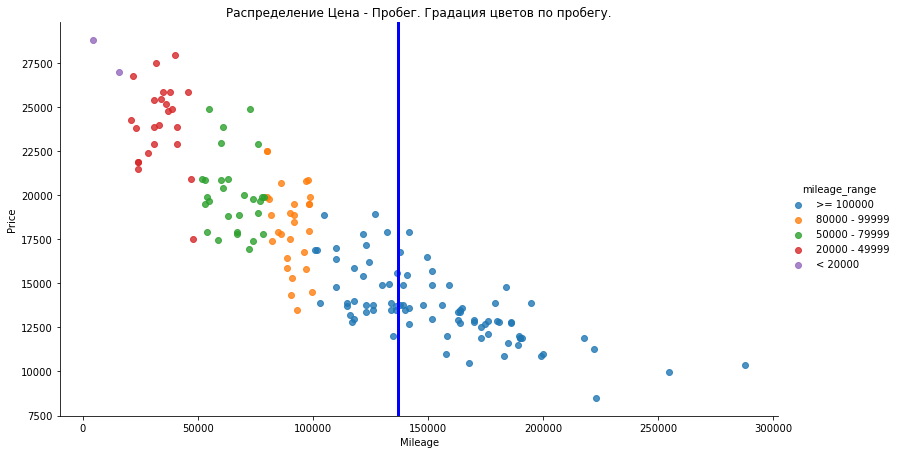

In [46]:
up_limit_budget = 18000
target_limit_budget = 15000
low_limit_budget = 12000
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='mileage_range', 
           legend=True, 
           height=6, 
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по пробегу.");
#plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
#plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
#plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axvline(137000, linestyle = '-', color ='blue', linewidth = 3);

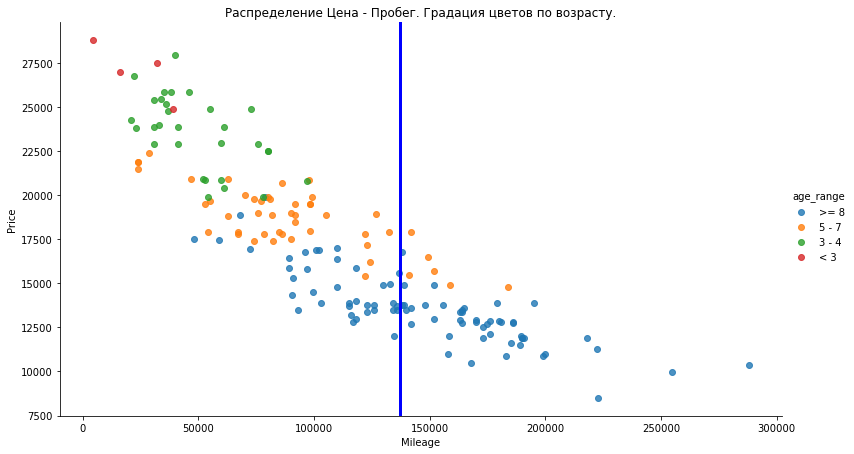

In [47]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='age_range', 
           legend=True, 
           height=6,
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по возрасту.");
#plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
#plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
#plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axvline(137000, linestyle = '-', color ='blue', linewidth = 3);

In [48]:
# Use the 'hue' argument to provide a factor variable
#sns.lmplot( x="Mileage", 
           #y="Price", 
           #data=df, 
           #fit_reg=False, 
           #hue='engine', 
           #legend=True, 
           #height=6,
           #aspect=15/8.27);
#ax = plt.gca();
#ax.set_title("Распределение Цена - Пробег. Градация цветов по двигателю");
#plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
#plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
#plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);

In [49]:
#fig, ax = plt.subplots(figsize=(15,6))
#sns.histplot(data=df, x="Mileage", hue=df["model"], multiple="dodge", shrink=.5).set_title('Количество проданных автомобилей и их пробег');

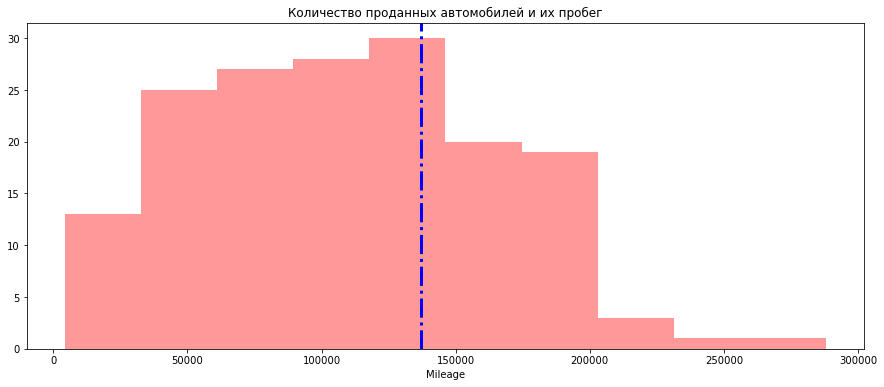

In [50]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot( df['Mileage'], 
             hist=True, 
             kde=False, 
             rug=False, 
             color="red" ).set_title('Количество проданных автомобилей и их пробег');
plt.axvline(137000, linestyle = '-.', color ='blue', linewidth = 3);
plt.xlabel("Mileage");

In [51]:
pivot_report = pd.pivot_table(df, 
                              values='Price', 
                              index=['engine'], 
                              aggfunc={'count','median'}).reset_index()
pivot_report

,engine,count,median
0,1.8,167,16800


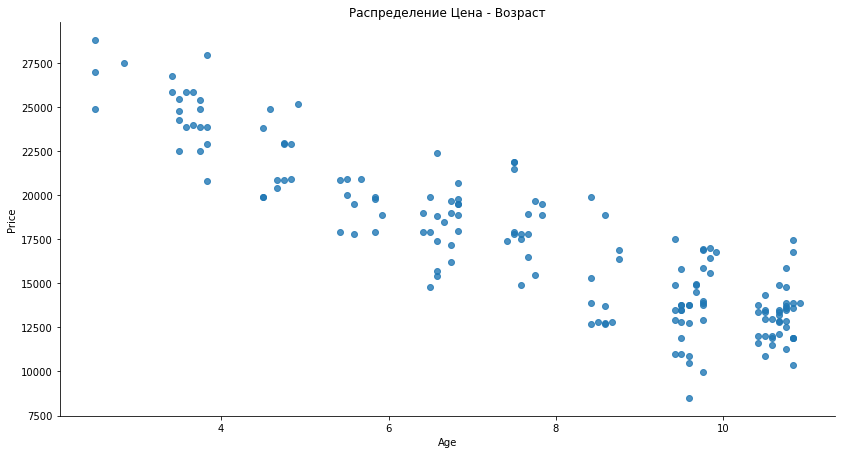

In [52]:
#fig, ax = plt.subplots(figsize=(15,6))
#ax.set_title("Распределение Год - Цена");
#use the function regplot to make a scatterplot
#sns.regplot(x=df["Age"], y=df["Price"]);

sns.lmplot(x="Age", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           legend=False,
           height=6,
           aspect=16/8.27)
ax = plt.gca();
ax.set_title("Распределение Цена - Возраст");
#plt.axhline(up_limit_budget, linestyle = '-', color ='red', linewidth = 3);
#plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
#plt.axhline(low_limit_budget, linestyle = '-', color ='red', linewidth = 3);

In [53]:
df.corr()

,Mileage,Price,Age
Mileage,1.000000,-0.880868,0.734985
Price,-0.880868,1.000000,-0.894730
Age,0.734985,-0.894730,1.000000


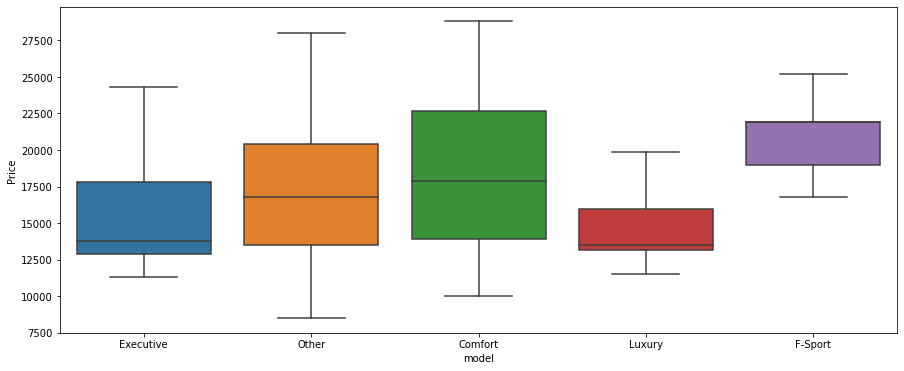

In [54]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=df["model"], y=df["Price"]);

In [55]:
#Hybrid = df[df['model'] == 'Hybrid']['Price'].median()
#Electric = df[df['model'] == 'Electric']['Price'].median()

#print('Медианная цена гибрида = {:.2f}'.format(Hybrid))
#print('Медианная цена електро = {:.2f}'.format(Electric))

In [56]:
df.groupby('model').median()

,Mileage,Price,Age
model,,,
Comfort,90000.0,17900,6.748941
Executive,152000.0,13800,10.414998
F-Sport,36220.0,21900,7.496389
Luxury,134000.0,13490,10.414998
Other,101000.0,16800,7.833152


## 4. Выборка из того, что интересно для покупки

In [57]:
#int = df[(df['mileage_range'] == '< 20000')|(df['mileage_range'] == '20000 - 49999')]
#int.head(3)

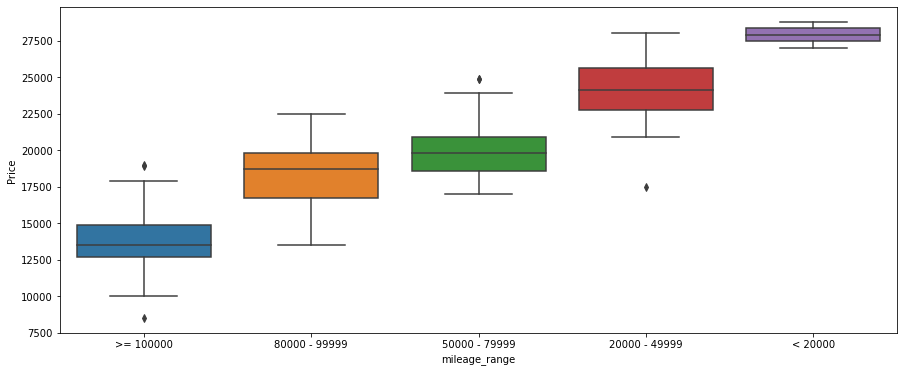

In [58]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=df["mileage_range"], y=df["Price"] );

In [59]:
#new = df[df['mileage_range'] == '< 20000']
#semi_new = df[df['mileage_range'] == '20000 - 49999']

In [60]:
#new_price = new['Price'].median()
#new_age = new['Age'].median()
#print('медианная цена Hyundai Ioniq с пробегом до 20000 км = {:.2f}, возраст автомобиля = {:.3f}'.format(new_price,new_age))

#seminew_price = semi_new['Price'].median()
#seminew_age = semi_new['Age'].median()
#print('медианная цена Hyundai Ioniq с пробегом от 20000 км до 49999 км = {:.2f}, возраст автомобиля = {:.3f}'.format(seminew_price,seminew_age))

In [61]:
#fig, ax = plt.subplots(figsize=(15,6))
#sns.boxplot( x=int["mileage_range"], y=int["Age"] );

In [62]:
#start_range = semi_new['Price'].quantile(0.25) # 25%
#end_range = semi_new['Price'].quantile(0.5) # 50%

In [63]:
#print('выгодная цена для Hyundai Ioniq c пробегом от 20000 км до 49999 км = {:.2f} - {:.2f}'.format(start_range,end_range))

### Выводы

- Появились на рынке финляндии в 2016-2017 году

- Медианная цена комплектации гибрид = 20450.00

- Медианная цена комлектации електро = 23900.00

- медианная цена Hyundai Ioniq с пробегом до 20000 км = 27580.00, возраст автомобиля = 1.750

- медианная цена Hyundai Ioniq с пробегом от 20000 км до 49999 км = 23795.00, возраст автомобиля = 3.496

- выгодная цена для Hyundai Ioniq c пробегом от 20000 км до 49999 км = 22682.50 - 23795.00